In [1]:
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mplplt
import numpy as np
import pyemma

import pyemma.coordinates as coor
import pyemma.plots as mplt
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mplplt
import numpy as np
import pyemma

import pyemma.coordinates as coor
import pyemma.plots as mplt
%pylab inline
%matplotlib inline

import scipy.stats as stats
import math

import MDAnalysis as mda
from MDAnalysis.analysis import rdf

# Plots setup 
from matplotlib import rc
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans", 
    "font.serif": ["computer modern roman"],
    "font.size": 16})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [3]:
cut_300K9=0
colvar_inter_300K9 = np.loadtxt("./colvar_inter")[cut_300K9:]
print(colvar_inter_300K9.shape)

(13508, 513)


In [4]:
scatter_data_300K9 = np.zeros(((len(colvar_inter_300K9.T)-1),len(colvar_inter_300K9),1),dtype='float')
print(scatter_data_300K9.shape)
#####################################################
for i in range(len(colvar_inter_300K9.T)-1):
    for j in range(len(colvar_inter_300K9)):       
        scatter_data_300K9[i][j][0]=colvar_inter_300K9.T[i+1][j]
myfile = open('./scatter_300K9.txt', 'w')
for i in range(len(colvar_inter_300K9.T)-1):
    for j in range(len(colvar_inter_300K9)):
        myfile.write("%lf\n" % (scatter_data_300K9[i][j][0]))
myfile.close()
####################################################
scatter_300K9 = np.loadtxt(".//scatter_300K9.txt")
#print(scatter_300K9.shape)

(512, 13508, 1)


In [5]:
#this needs to be universal for the same system
N_threshold=45

In [6]:
N_steps_300K9 = len(colvar_inter_300K9)
print(N_steps_300K9)
N_chains_300K9 = len(colvar_inter_300K9.T)-1
print(N_chains_300K9)

N_cluster_300K9 = np.zeros((N_steps_300K9),dtype='float')
N_cluster_300K9.shape

N_cluster_300K9_id = np.zeros((N_steps_300K9,N_chains_300K9),dtype='float')
N_cluster_300K9_id.shape

for i in range(N_steps_300K9):
    count = 0 
    for j in range(N_chains_300K9):
        if colvar_inter_300K9[i][j+1] >= N_threshold: 
            count = count + 1
            N_cluster_300K9_id[i][j]=1
        N_cluster_300K9[i] = count 

13508
512


In [7]:
N_threshold_shift=N_threshold*2


N_cluster_300K9_id_shift = np.zeros((N_steps_300K9,N_chains_300K9),dtype='float')
N_cluster_300K9_id_shift.shape

N_cluster_300K9_shift = np.zeros((N_steps_300K9),dtype='float')
N_cluster_300K9_shift.shape

for i in range(N_steps_300K9):
    count = 0 
    for j in range(N_chains_300K9):
        if colvar_inter_300K9[i][j+1] >= N_threshold_shift: 
            count = count + 1
            N_cluster_300K9_id_shift[i][j]=1
        N_cluster_300K9_shift[i]=count 

print(N_threshold_shift)

90


In [8]:
def read(data):
    "read-in original xyz data"
    with md.formats.XYZTrajectoryFile(data) as f:
        xyz = f.read()
    return(xyz)

In [9]:
xyz_DHH1C_300K9=read('./COM_centered.xyz')
dist_DHH1C_300K9=np.zeros((N_chains_300K9,N_steps_300K9),dtype='float')
print(dist_DHH1C_300K9.shape)
for i in range(N_chains_300K9):
    for j in range(N_steps_300K9):
        dist_DHH1C_300K9[i][j]=xyz_DHH1C_300K9[j][i][0]*xyz_DHH1C_300K9[j][i][0]+xyz_DHH1C_300K9[j][i][1]*xyz_DHH1C_300K9[j][i][1]+xyz_DHH1C_300K9[j][i][2]*xyz_DHH1C_300K9[j][i][2]
        dist_DHH1C_300K9[i][j]=np.sqrt(dist_DHH1C_300K9[i][j])
        
myfile = open('./300K9.txt', 'w')
for i in range(N_chains_300K9):
    for j in range(N_steps_300K9):
        myfile.write("%lf\n" % (dist_DHH1C_300K9[i][j]*0.1))
myfile.close()

distance_DHH1C_300K9=np.loadtxt('./300K9.txt')
distance_DHH1C_300K9.shape

(512, 13508)


(6916096,)

In [10]:
distance_DHH1C_300K9.shape

(6916096,)

In [11]:
scatter_300K9

array([113.855096, 127.125253, 105.19454 , ..., 131.626584, 155.070785,
       150.186424])

<>:55: DeprecationWarning: invalid escape sequence \A
<>:55: DeprecationWarning: invalid escape sequence \A
/tmp/ipykernel_14872/824453850.py:55: DeprecationWarning: invalid escape sequence \A
  axes300.set_ylabel("COM distance (\AA)",fontsize=18)
/tmp/ipykernel_14872/824453850.py:37: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PiYG_r").copy()
  misc['cbar'].cmap.set_over(color='white')


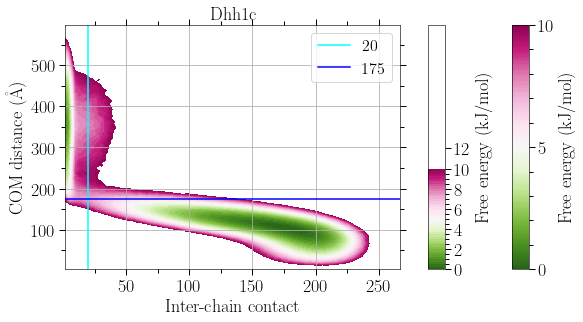

In [34]:
from matplotlib.lines import Line2D
from matplotlib.ticker import AutoMinorLocator
######################################################################################
######################################################################################
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5 + 1000 * fig.get_figwidth()))
gh = int(np.floor(0.5 + 1000 * fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

axes300 = fig.add_subplot(gs[6500:11000,1000:7000])
axes303 = fig.add_subplot(gs[6500:11000,7500:7800])
axes301 = fig.add_subplot(gs[6500:11000,9000:9300])

_, _, misc=pyemma.plots.plot_free_energy(
                          scatter_300K9,
                          distance_DHH1C_300K9*10,
                          offset=-1,                 
                          ax=axes300,
                          kT = 2.49,
                          vmin=0,
                          vmax=10,
                          cax=axes303,
                          avoid_zero_count=True,
                          nbins=100,
                          #ncontours=20,
                          levels=100,
                          minener_zero=True,
                          cmap='PiYG_r',
                          cbar_label='Free energy (kJ/mol)',
                          legacy=False,
                          cbar=True,
                          extend='neither')

misc['cbar'].set_label('Free energy (kJ/mol)', rotation=-270,fontsize=18)
misc['cbar'].set_ticks(np.arange(0,13,2))
misc['cbar'].cmap.set_over(color='white')
axes303.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
axes303.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)

axes300.grid()
axes300.xaxis.set_minor_locator(AutoMinorLocator(2))
axes300.yaxis.set_minor_locator(AutoMinorLocator(2))
axes300.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
axes300.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)

############################################
#axes300.axvline(x=N_threshold,linestyle=':',color='green',label="%.0lf" % (N_threshold))
N_threshold_2_DHH1C_300K9 = 20
axes300.axvline(x=N_threshold_2_DHH1C_300K9,linestyle='-',color='cyan',label="%.0lf" % (N_threshold_2_DHH1C_300K9))
N_threshold_3_DHH1C_300K9 = 175
axes300.axhline(y=N_threshold_3_DHH1C_300K9,linestyle='-',color='blue',label="%.0lf" % (N_threshold_3_DHH1C_300K9))
############################################

axes300.set_ylabel("COM distance (\AA)",fontsize=18)
axes300.set_xlabel("Inter-chain contact",fontsize=18)
axes300.set_title(r"Dhh1c",fontsize=18)

cmap = mpl.cm.PiYG_r
bounds = np.arange(0,10.1,0.1).tolist()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(axes301, cmap=cmap,norm=norm,orientation='vertical')
cb2.set_ticks(np.arange(0,11,5))
cb2.ax.set_ylabel('Free energy (kJ/mol)',fontsize=18)
axes301.yaxis.set_minor_locator(AutoMinorLocator(5))
cb2.ax.tick_params(direction='out', which='major',length=6, width=1.0, labelsize=18)
cb2.ax.tick_params(direction='out', which='minor',length=4, width=1.0, labelsize=18)
axes300.legend()
#fig.savefig('new_2.png', dpi=600, bbox_inches='tight')

In [13]:
print(N_threshold_3_DHH1C_300K9)
print(N_threshold_2_DHH1C_300K9)
identity_DHH1C_300K9 = np.zeros((N_chains_300K9,N_steps_300K9),dtype="float")
for i in range(N_chains_300K9):
    for j in range(N_steps_300K9):
        if dist_DHH1C_300K9[i][j]<= N_threshold_3_DHH1C_300K9 and scatter_data_300K9.T[0].T[i][j]>= N_threshold_2_DHH1C_300K9:
            identity_DHH1C_300K9[i][j]=1
        else:
            pass

175
20


175
20


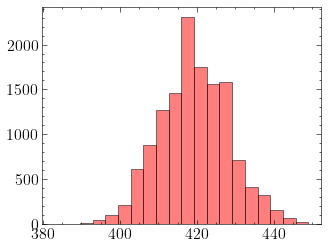

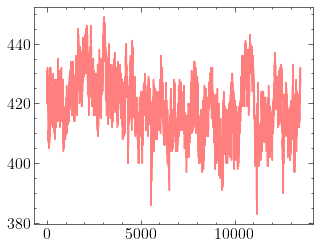

In [14]:
print(N_threshold_3_DHH1C_300K9)
print(N_threshold_2_DHH1C_300K9)
identity_DHH1C_300K9 = np.zeros((N_chains_300K9,N_steps_300K9),dtype="float")
for i in range(N_chains_300K9):
    for j in range(N_steps_300K9):
        if dist_DHH1C_300K9[i][j]<= N_threshold_3_DHH1C_300K9 and scatter_data_300K9.T[0].T[i][j]>= N_threshold_2_DHH1C_300K9:
            identity_DHH1C_300K9[i][j]=1
        else:
            pass

clustersize_300K9 = np.zeros((N_steps_300K9),dtype="float")
for i in range(N_steps_300K9):
    clustersize_300K9[i]=np.sum(identity_DHH1C_300K9.T[i])

plt.hist(clustersize_300K9,histtype='bar', ec='black',bins=20,
         color = 'red',alpha=0.5)
plt.show()

plt.plot(clustersize_300K9,color = 'red',alpha=0.5)
plt.show()

In [15]:
def blockAverage(datastream, isplot=True, maxBlockSize=0):

 
    Nobs         = len(datastream)           # total number of observations in datastream
    minBlockSize = 1;                        # min: 1 observation/block
 
    if maxBlockSize == 0:
        maxBlockSize = int(Nobs/2);          # max: 4 blocs (otherwise can't calc variance)
  
    NumBlocks = maxBlockSize - minBlockSize  # total number of block sizes

    blockMean = np.zeros(NumBlocks)          # mean (expect to be "nearly" constant)
    blockVar  = np.zeros(NumBlocks)               # variance associated with each blockSize
    blockCtr  = 0

    for blockSize in range(minBlockSize, maxBlockSize):

        Nblock    = int(Nobs/blockSize)               # total number of such blocks in datastream
        obsProp   = np.zeros(Nblock)                  # container for parcelling block 


        for i in range(1,Nblock+1):
            
            ibeg = (i-1) * blockSize
            iend =  ibeg + blockSize
            obsProp[i-1] = np.mean(datastream[ibeg:iend])

        blockMean[blockCtr] = np.mean(obsProp)
        blockVar[blockCtr]  = np.var(obsProp)/(Nblock - 1)
        blockCtr += 1
 
    v = np.arange(minBlockSize,maxBlockSize)
 
    #if isplot:
#
#        plt.subplot(2,1,1)
#        plt.plot(v, np.sqrt(blockVar),'ro-',lw=2)
#        for x,y in zip(v, np.sqrt(blockVar)):
#            label = "{:.2f}".format(y)
#            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10),ha='center') 
#        
#        plt.xlabel('block size')
#        plt.ylabel('std')
#
#        plt.subplot(2,1,2)
#        plt.errorbar(v, blockMean, np.sqrt(blockVar))
#        plt.ylabel('<x>')
#        plt.xlabel('block size')
#        
#        print("<x> = {0:f} +/- {1:f}\n".format(blockMean[-1], np.sqrt(blockVar[-1])))
#
#        plt.tight_layout()
#        plt.show()
        
    return v, blockVar, blockMean

<x> = 419.592277 +/- 3.350515



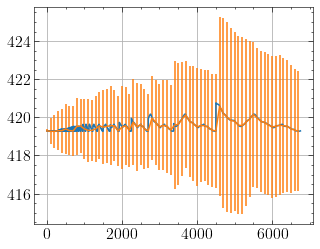

In [16]:
v, blockVar, blockMean=blockAverage(clustersize_300K9)
plt.plot(v,blockMean)
plt.errorbar(v[::100], blockMean[::100], np.sqrt(blockVar)[::100])
plt.grid()
print("<x> = {0:f} +/- {1:f}\n".format(blockMean[::100][int(len(v[::100])/2)], 
                                       np.sqrt(blockVar[::100][int(len(v[::100])/2)])))

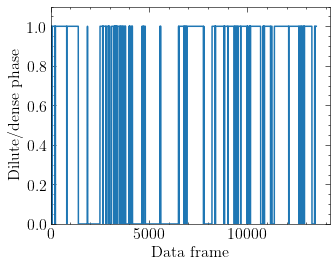

In [17]:
plt.plot(identity_DHH1C_300K9[0])
plt.xlabel("Data frame")
plt.ylabel("Dilute/dense phase")
plt.ylim(0,1.1)
plt.xlim(0,)
plt.savefig('test.png', dpi=600, bbox_inches='tight');

# calculate dissociation rate

every data point is 10000*10 fs = 100 ps = 0.1 ns

In [18]:
import pandas as pd

In [19]:
f=1
identity_kinetics5=np.zeros((len(identity_DHH1C_300K9.T[::f].T),2,len(identity_DHH1C_300K9.T[::f])),dtype='float')
print(identity_kinetics5.shape)
for i in range(len(identity_kinetics5)):
    for j in range(len(identity_kinetics5.T)):
        identity_kinetics5[i][0][j]=j*f
        identity_kinetics5[i][1][j]=identity_DHH1C_300K9.T[::f].T[i][j]

(512, 2, 13508)


In [24]:
import warnings
warnings.filterwarnings('ignore')
dissociate5_threshold2=8
dissociate5_time = []
for i in range(N_chains_300K9): 
    af = pd.DataFrame(identity_kinetics5[i]).T
    af.columns = ['a', 'b']
    af['value_grp'] = (af.b.diff(1) != 0).astype('int').cumsum()

    aaf=pd.DataFrame({'Begin' : af.groupby('value_grp').a.first(), 
              'End' : af.groupby('value_grp').a.last(),
              'Consecutive' : af.groupby('value_grp').size(), 
              'No' : af.groupby('value_grp').b.first()}).reset_index(drop=True)
    y=aaf
    k=0
    for j in range(len(y.No)):
        if j>0:
            if y.Consecutive[j] < dissociate5_threshold2:
                y.End[k]=y.End[j]
                l=y.Consecutive[k]+y.Consecutive[j]
                y.Consecutive[k]=l
                y.No[j]=3.0
            else:
                k=j
    p=y[y.No == 3.0].index
    z=y.drop(p).reset_index(drop=True)
    for j in range(len(z.No)):
        if j<len(z.No)-1:
            if z.No[j]==z.No[j+1]:
                z.Consecutive[j+1]=z.Consecutive[j]+z.Consecutive[j+1]
                z.Begin[j+1]=z.Begin[j]
                z.No[j]=4.0          
    q=z.loc[z['No'] == 1]
    s=q.reset_index(drop=True)
    #print(s)
    for j in range(len(s.No)):
        if j>0 and j<len(s.No)-1:
            r=s.End[j]-s.End[j-1]
            dissociate5_time.append(r)
warnings.filterwarnings('default')

In [25]:
len(dissociate5_time)

6815

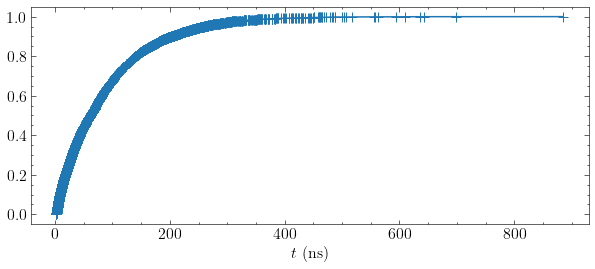

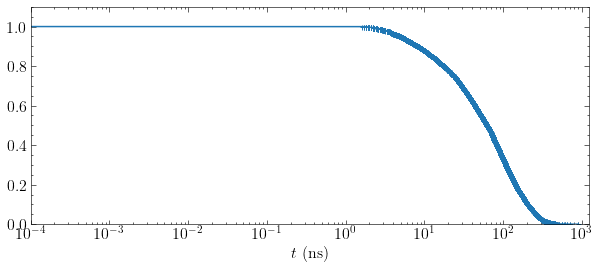

(6814,)


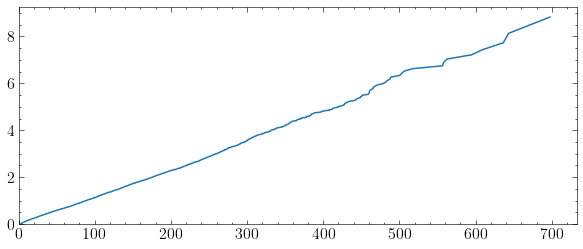

1/tau is 0.011741


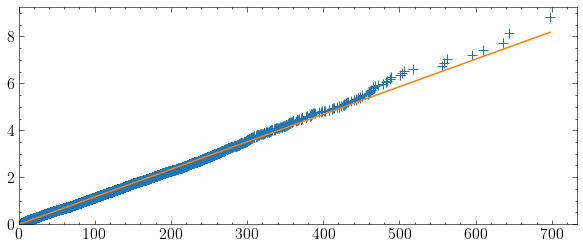

In [26]:
plt.rcParams["figure.figsize"] = (10,4)

DT5=np.zeros(len(dissociate5_time),dtype="float")
for i in range(len(dissociate5_time)):
    DT5[i]=dissociate5_time[i]*0.1*f
    
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_DT5 = ECDF(DT5)
plt.plot(ecdf_DT5.x, ecdf_DT5.y,marker="+",markersize=10)
plt.xlabel("$t$ (ns)")
plt.savefig('test.png', dpi=600, bbox_inches='tight');
plt.show()

plt.plot(ecdf_DT5.x, 1-ecdf_DT5.y,marker="+",markersize=5)
plt.xlabel("$t$ (ns)")
plt.xscale("log")
plt.ylim(0,1.1)
plt.xlim(0.0001,)
plt.show()

p=ecdf_DT5.y[1:-1]
print(p.shape)
test=np.empty((2,len(p)),float)
for i in range(len(p)):
    test[0][i]=-np.log(1-p[i]) 
plt.plot(ecdf_DT5.x[1:-1],test[0],marker="x",markersize=0)
plt.xlim(0,)
plt.ylim(0,)
plt.show()

m_dhh1c, c_dhh1c = np.polyfit(ecdf_DT5.x[1:-1], test[0], 1)

plt.plot(ecdf_DT5.x[1:-1],test[0],marker="+",markersize=10,linewidth=0)
plt.plot(ecdf_DT5.x[1:-1],m_dhh1c*ecdf_DT5.x[1:-1]+c_dhh1c)
plt.xlim(0,)
plt.ylim(0,)
print("1/tau is %lf" % m_dhh1c)
plt.savefig('test.png', dpi=600, bbox_inches='tight');

#np.save("y",1-ecdf_DT5.y[:-1])
#np.save("x",ecdf_DT5.x[:-1])
#np.save("m_dhh1c",m_dhh1c)

# reproduce the dissocation time distribution 

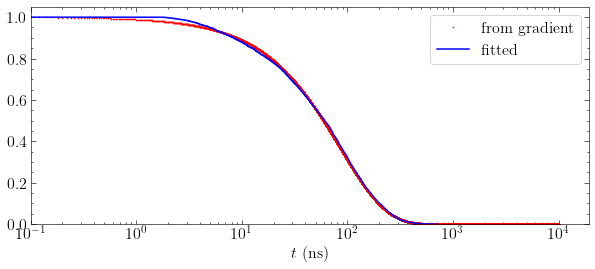

In [27]:
x=np.arange(0,10000,0.02)
y1=np.exp(-x*m_dhh1c)
plt.plot(x,y1,marker="x",markersize=1,label="from gradient",ls="-",color="r",linewidth=0)
plt.plot(ecdf_DT5.x[:-1], 1-ecdf_DT5.y[:-1],marker="+",markersize=0,label="fitted",color="b")

plt.xlabel("$t$ (ns)")
plt.xscale("log")
plt.xlim(0.1,)
plt.ylim(0,)
plt.legend()
plt.savefig('test.png', dpi=600, bbox_inches='tight');
plt.show()

# calculate association rate

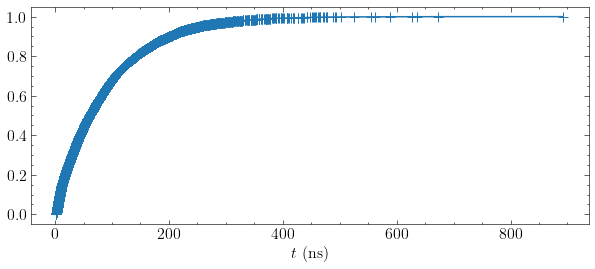

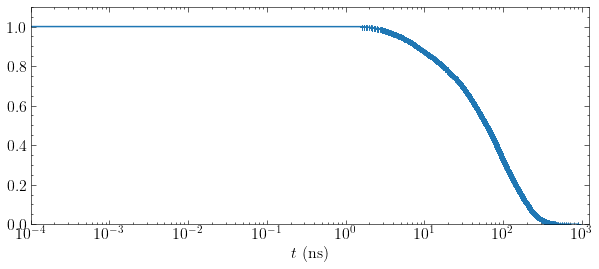

(6471,)


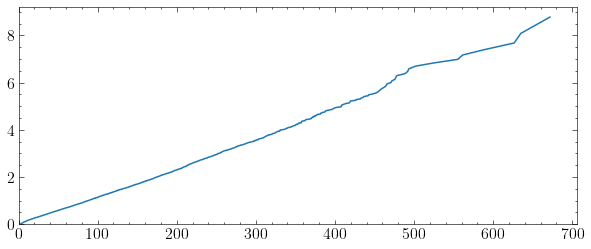

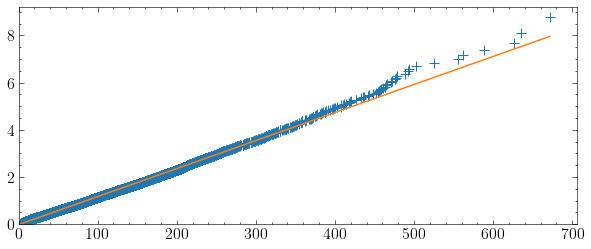

1/tau is 0.011878


In [28]:
import warnings
warnings.filterwarnings('ignore')

associate5_threshold2=dissociate5_threshold2
associate5_time = []
for i in range(N_chains_300K9): 
    af = pd.DataFrame(identity_kinetics5[i]).T
    af.columns = ['a', 'b']
    af['value_grp'] = (af.b.diff(1) != 0).astype('int').cumsum()

    aaf=pd.DataFrame({'Begin' : af.groupby('value_grp').a.first(), 
              'End' : af.groupby('value_grp').a.last(),
              'Consecutive' : af.groupby('value_grp').size(), 
              'No' : af.groupby('value_grp').b.first()}).reset_index(drop=True)
    y=aaf
    k=0
    for j in range(len(y.No)):
        if j>0:
            if y.Consecutive[j] < associate5_threshold2:
                y.End[k]=y.End[j]
                l=y.Consecutive[k]+y.Consecutive[j]
                y.Consecutive[k]=l
                y.No[j]=3.0
            else:
                k=j
    p=y[y.No == 3.0].index
    z=y.drop(p).reset_index(drop=True)
    for j in range(len(z.No)):
        if j<len(z.No)-1:
            if z.No[j]==z.No[j+1]:
                z.Consecutive[j+1]=z.Consecutive[j]+z.Consecutive[j+1]
                z.Begin[j+1]=z.Begin[j]
                z.No[j]=4.0          
    q=z.loc[z['No'] == 0]
    s=q.reset_index(drop=True)
    for j in range(len(s.No)):
        if j>0 and j<len(s.No)-1:
            r=s.End[j]-s.End[j-1]
            associate5_time.append(r)
warnings.filterwarnings('default')

plt.rcParams["figure.figsize"] = (10,4)

AS5=np.zeros(len(associate5_time),dtype="float")
for i in range(len(associate5_time)):
    AS5[i]=associate5_time[i]*0.1*f
    
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_AS5 = ECDF(AS5)
plt.plot(ecdf_AS5.x, ecdf_AS5.y,marker="+",markersize=10)
plt.xlabel("$t$ (ns)")
plt.show()

plt.plot(ecdf_AS5.x, 1-ecdf_AS5.y,marker="+",markersize=5)
plt.xlabel("$t$ (ns)")
plt.xscale("log")
plt.ylim(0,1.1)
plt.xlim(0.0001,)
plt.show()

p=ecdf_AS5.y[1:-1]
print(p.shape)
test=np.empty((2,len(p)),float)
for i in range(len(p)):
    test[0][i]=-np.log(1-p[i]) 
plt.plot(ecdf_AS5.x[1:-1],test[0],marker="x",markersize=0)
plt.xlim(0,)
plt.ylim(0,)
plt.show()

m_dhh1c_as, c_dhh1c_as = np.polyfit(ecdf_AS5.x[1:-1], test[0], 1)


plt.plot(ecdf_AS5.x[1:-1],test[0],marker="+",markersize=10,linewidth=0)
plt.plot(ecdf_AS5.x[1:-1],m_dhh1c_as*ecdf_AS5.x[1:-1]+c_dhh1c_as)
plt.xlim(0,)
plt.ylim(0,)
plt.show()
print("1/tau is %lf" % m_dhh1c_as)

# calculate dissocation rate using different frequecies of data 

reduce the data set by half

In [40]:
f_6=2
identity_kinetics6=np.zeros((len(identity_DHH1C_300K9.T[::f_6].T),2,len(identity_DHH1C_300K9.T[::f_6])),dtype='float')
print(identity_kinetics6.shape)
for i in range(len(identity_kinetics6)):
    for j in range(len(identity_kinetics6.T)):
        identity_kinetics6[i][0][j]=j*1
        identity_kinetics6[i][1][j]=identity_DHH1C_300K9.T[::f_6].T[i][j]

(512, 2, 6754)


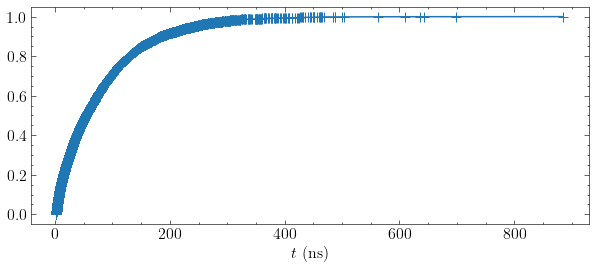

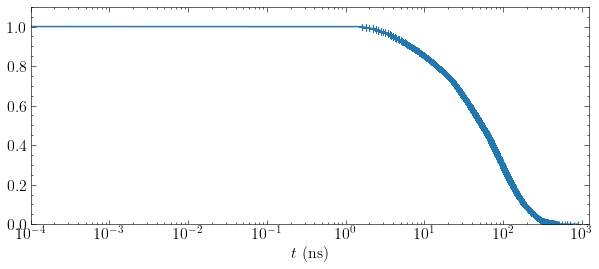

(7625,)


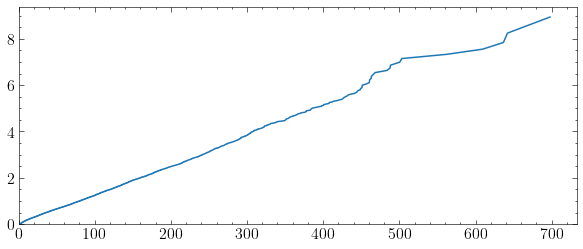

0.0125567244626635 0.015712041684466795
1/tau is 0.012557


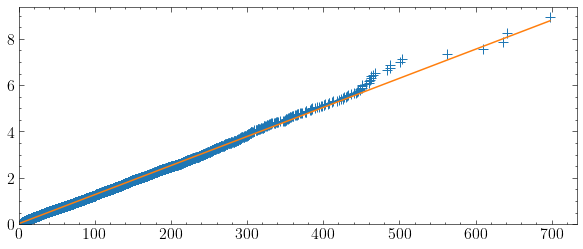

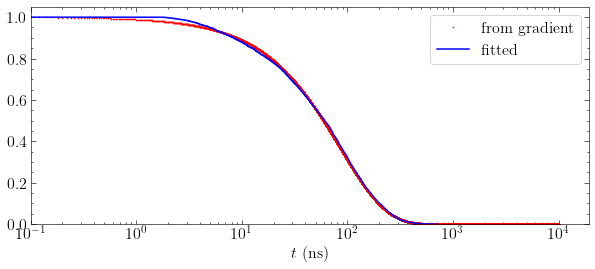

In [42]:
import warnings
warnings.filterwarnings('ignore')
dissociate6_threshold2=4
dissociate6_time = []
for i in range(N_chains_300K9): 
    af = pd.DataFrame(identity_kinetics6[i]).T
    af.columns = ['a', 'b']
    af['value_grp'] = (af.b.diff(1) != 0).astype('int').cumsum()

    aaf=pd.DataFrame({'Begin' : af.groupby('value_grp').a.first(), 
              'End' : af.groupby('value_grp').a.last(),
              'Consecutive' : af.groupby('value_grp').size(), 
              'No' : af.groupby('value_grp').b.first()}).reset_index(drop=True)
    y=aaf
    k=0
    for j in range(len(y.No)):
        if j>0:
            if y.Consecutive[j] < dissociate6_threshold2:
                y.End[k]=y.End[j]
                l=y.Consecutive[k]+y.Consecutive[j]
                y.Consecutive[k]=l
                y.No[j]=3.0
            else:
                k=j
    p=y[y.No == 3.0].index
    z=y.drop(p).reset_index(drop=True)
    for j in range(len(z.No)):
        if j<len(z.No)-1:
            if z.No[j]==z.No[j+1]:
                z.Consecutive[j+1]=z.Consecutive[j]+z.Consecutive[j+1]
                z.Begin[j+1]=z.Begin[j]
                z.No[j]=4.0          
    q=z.loc[z['No'] == 1]
    s=q.reset_index(drop=True)
    for j in range(len(s.No)):
        if j>0 and j<len(s.No)-1:
            r=s.End[j]-s.End[j-1]
            dissociate6_time.append(r)
warnings.filterwarnings('default')

plt.rcParams["figure.figsize"] = (10,4)

DT6=np.zeros(len(dissociate6_time),dtype="float")
for i in range(len(dissociate6_time)):
    DT6[i]=dissociate6_time[i]*0.1*f_6
    
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_DT6 = ECDF(DT6)
plt.plot(ecdf_DT6.x, ecdf_DT6.y,marker="+",markersize=10)
plt.xlabel("$t$ (ns)")
plt.show()

plt.plot(ecdf_DT6.x, 1-ecdf_DT6.y,marker="+",markersize=6)
plt.xlabel("$t$ (ns)")
plt.xscale("log")
plt.ylim(0,1.1)
plt.xlim(0.0001,)
plt.show()

p=ecdf_DT6.y[1:-1]
print(p.shape)
test=np.empty((2,len(p)),float)
for i in range(len(p)):
    test[0][i]=-np.log(1-p[i]) #y=-ln(1-p)
plt.plot(ecdf_DT6.x[1:-1],test[0],marker="x",markersize=0)
plt.xlim(0,)
plt.ylim(0,)
plt.show()

m_dhh1c_6, c_dhh1c_6 = np.polyfit(ecdf_DT6.x[1:-1], test[0], 1) #, w=np.sqrt(test[0])) # fit log(y) = m*log(x) + c
print(m_dhh1c_6,c_dhh1c_6)

plt.plot(ecdf_DT6.x[1:-1],test[0],marker="+",markersize=10,linewidth=0)
plt.plot(ecdf_DT6.x[1:-1],m_dhh1c_6*ecdf_DT6.x[1:-1]+c_dhh1c_6)
plt.xlim(0,)
plt.ylim(0,)
print("1/tau is %lf" % m_dhh1c_6)
plt.show()
#########################################################
x=np.arange(0,10000,0.02)
y1=np.exp(-x*m_dhh1c)
plt.plot(x,y1,marker="x",markersize=1,label="from gradient",ls="-",color="r",linewidth=0)
plt.plot(ecdf_DT5.x[:-1], 1-ecdf_DT5.y[:-1],marker="+",markersize=0,label="fitted",color="b")

plt.xlabel("$t$ (ns)")
plt.xscale("log")
plt.xlim(0.1,)
plt.ylim(0,)
plt.legend()
plt.show()
#########################################################